**Classification Challange**

Università degli studi di Cassino e del Lazio Meridionale

Medical Imaging and Applications (MAIA)

Taiabur Rahman

Workflow 
1. Preprocessing
2. Feature selection
3. Training
4. Testing
5. Result

In [1]:
# import libraries and classes  
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score
import seaborn as sns

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Preprocess the data
def preprocess_data(df):
    X = df.iloc[:, 1:-1] # extract features (remove ID and Label)
    y = df.iloc[:, -1] # extract labels (last column)
    # Handle missing values, feature scaling, or feature selection as needed
    scaler = StandardScaler()
    X = scaler.fit_transform(X) # scale the features

    # Map class labels to binary values
    label_mapping = {'AD': 1, 'CTL': 0}
    y = y.map(label_mapping)
    
    return X, y

def reversed_map(y):
    # Map class labels to binary values
    label_mapping = { 1:'AD', 0:'CTL'}
    y = y.map(label_mapping)
    
    return y

# Split the train dataset into a training set and a validation set
def split_train_validation(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=42)
    return X_train, X_val, y_train, y_val
def pro_pca(X):
    # Apply PCA
    pca = PCA(n_components=15)  # Specify the number of components to retain
    X_pca = pca.fit_transform(X)
    return X_pca
# Train a binary classification model using logistic regression
def train_logistic_regression(X_train, y_train, X_val, y_val):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    mcc = matthews_corrcoef(y_val, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_val, y_pred)

    return model, accuracy, precision, sensitivity, f1, roc_auc,mcc,balanced_accuracy
# Train a binary classification model using decision tree
def train_decision_tree(X_train, y_train, X_val, y_val):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    mcc = matthews_corrcoef(y_val, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc,mcc

# Train a binary classification model using random forest
def train_random_forest(X_train, y_train, X_val, y_val):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    mcc = matthews_corrcoef(y_val, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc,mcc

def train_svc(X_train_ADCTL, y_train_ADCTL,X_test_ADCTL,y_test_ADCTL):
    # Train the SVM model
    model = SVC()
    model.fit(X_train_ADCTL, y_train_ADCTL)

    # Predict on the test set
    y_pred = model.predict(X_test_ADCTL)
    # Evaluate the model
    accuracy = accuracy_score(y_test_ADCTL, y_pred)
    precision = precision_score(y_test_ADCTL, y_pred)
    sensitivity = recall_score(y_test_ADCTL, y_pred)
    f1 = f1_score(y_test_ADCTL, y_pred)
    roc_auc = roc_auc_score(y_test_ADCTL, y_pred)
    mcc = matthews_corrcoef(y_test_ADCTL, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc,mcc

# Define a function to train and evaluate a model using cross-validation
def train_and_evaluate_model(model, X, y):
    # Perform 10-fold cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    return scores.mean()

# Create a pipeline with PCA and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('pca', PCA(n_components=2)),  # Apply PCA with 2 components
    ('classifier', LogisticRegression())  # Logistic regression classifier
])

In [3]:
# import datasets
ADCTL_train_dataset=pd.read_csv("datasets/ADCTLtrain.csv")
# import test datasets
# ADCTL_test_dataset=pd.read_csv("datasets/ADCTLtest.csv")
ADCTL_test_dataset=pd.read_csv("datasets/ADCTLtest_wl.csv")

In [4]:
ADCTL_train_dataset.head()

,ID,Background,Precentral_L,Precentral_R,Frontal_Sup_2_L,Frontal_Sup_2_R,Frontal_Mid_2_L,Frontal_Mid_2_R,Frontal_Inf_Oper_L,Frontal_Inf_Oper_R,...,UQCRHL,UQCRQ,UTP6,VCAN,ZMAT2,ZNF281,ZNF467,ZNHIT3,ZZEF1,Label
0,ADCTL001,0.007495,0.262134,0.203567,0.258888,0.261755,0.320331,0.272735,0.316372,0.289429,...,9.595161,8.900996,8.173745,10.101391,9.733100,8.917093,9.391262,8.406436,7.943020,AD
1,ADCTL002,0.009005,0.249045,0.209544,0.280683,0.264050,0.300900,0.266972,0.286501,0.249771,...,10.309510,10.387745,7.607429,10.867843,10.900267,9.512067,9.399022,9.641627,7.202653,AD
2,ADCTL003,0.009042,0.258154,0.218058,0.305928,0.292087,0.367378,0.307326,0.335420,0.279548,...,9.109219,9.588959,8.157013,10.492056,9.296857,9.646761,10.267368,8.631247,8.053132,AD
3,ADCTL004,0.007839,0.266917,0.237448,0.264880,0.266480,0.322434,0.247450,0.270734,0.272055,...,8.705610,8.929866,7.750466,9.769650,9.385932,9.723774,10.623113,8.570374,8.203513,AD
4,ADCTL005,0.009090,0.282655,0.249729,0.340169,0.320847,0.389368,0.316534,0.348195,0.300438,...,9.052294,8.773474,7.707519,10.567930,9.123317,9.519577,10.105397,8.123388,7.868757,AD


In [5]:
# Data preprocessing
ADCTL_x, ADCTL_y=preprocess_data(ADCTL_train_dataset)
ADCTLpca=pro_pca(ADCTL_x)
#Dataset split
ADCTL_train_x,ADCT_val_x,ADCTL_train_y,ADCTL_label_y=split_train_validation(ADCTLpca, ADCTL_y)

In [6]:
model_svm, acc, prec, rec, f1, roc_auc,mmc=train_svc(ADCTL_train_x,ADCTL_train_y,ADCT_val_x,ADCTL_label_y)
print(model_svm, acc, prec, rec, f1, roc_auc,mmc)


SVC() 0.808695652173913 0.7580645161290323 0.8703703703703703 0.8103448275862069 0.812234365513054 0.6252284256270039


In [7]:

# Create a DataFrame to store the ID, predicted probabilities, and predicted labels
pca_df = pd.DataFrame(data=ADCTLpca.round(4))

# print(pca_df)
# Save the DataFrame
pca_df.to_csv("0075718_Taiabur_ADCTLfeat.csv", index=False)

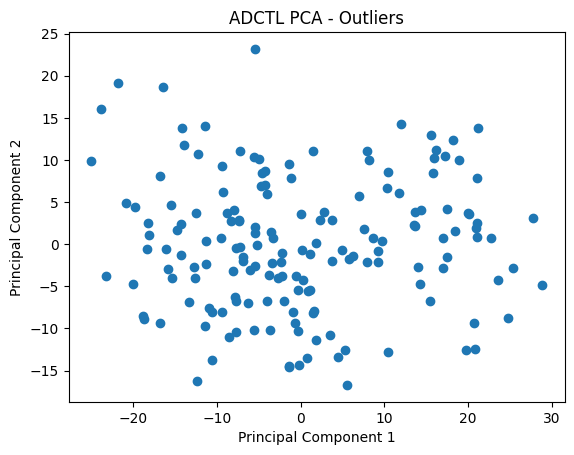

In [8]:
plt.scatter(ADCTLpca[:, 0], ADCTLpca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("ADCTL PCA - Outliers")
plt.show()

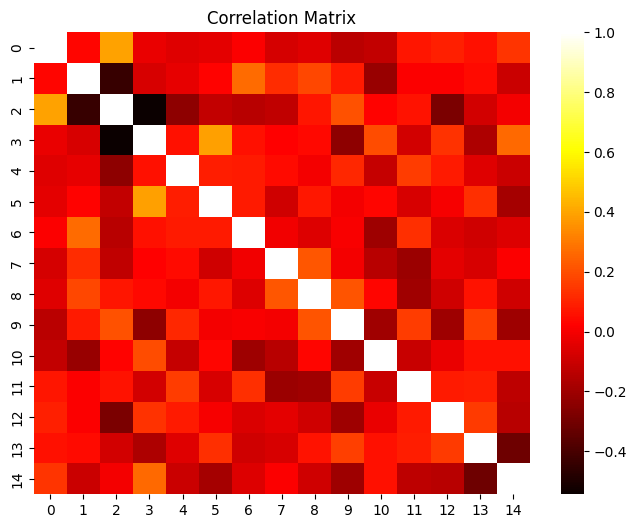

In [9]:
df=pd.DataFrame(ADCTL_train_x)
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='hot')
plt.title('Correlation Matrix')
plt.show()

In [10]:
model_logistic_reg, acc, prec, rec, f1, roc_auc,mcc,ba=train_logistic_regression(ADCTL_train_x,ADCTL_train_y,ADCT_val_x,ADCTL_label_y)
print(model_logistic_reg, acc, prec, rec, f1, roc_auc,mcc,ba)


LogisticRegression_df=pd.DataFrame()
LogisticRegression_df['']=['ADvsCTL']
LogisticRegression_df['Accuracy']=[acc.round(4)]
LogisticRegression_df['Sensitivity']=[rec.round(4)]
LogisticRegression_df['Spec']=[0]
LogisticRegression_df['Precision']=[prec.round(4)]
LogisticRegression_df['F1']=[f1.round(4)]
LogisticRegression_df['AUC']=[roc_auc.round(4)]
LogisticRegression_df['MCC']=[mcc.round(4)]
LogisticRegression_df['BA']=[ba.round(4)]

print(LogisticRegression_df)
LogisticRegression_df.to_csv("ADCTL_tr_summary.csv",index=False)
summary=pd.DataFrame(LogisticRegression_df)



LogisticRegression() 0.8260869565217391 0.8035714285714286 0.8333333333333334 0.8181818181818182 0.8265027322404372 0.6520165112184206 0.8265027322404372
            Accuracy  Sensitivity  Spec  Precision      F1     AUC    MCC   
0  ADvsCTL    0.8261       0.8333     0     0.8036  0.8182  0.8265  0.652  \

       BA  
0  0.8265  


In [11]:
#RandomForest Classification
model_random_forest, acc, prec, rec, f1, roc_auc,mcc=train_random_forest(ADCTL_train_x,ADCTL_train_y,ADCT_val_x,ADCTL_label_y)
print(model_random_forest, acc, prec, rec, f1, roc_auc,mcc)

summary=pd.DataFrame(LogisticRegression_df)


RandomForestClassifier() 0.7739130434782608 0.7258064516129032 0.8333333333333334 0.7758620689655172 0.7773224043715847 0.5553195593682723


In [12]:
ADCTL_test_dataset.describe()

,Background,Precentral_L,Precentral_R,Frontal_Sup_2_L,Frontal_Sup_2_R,Frontal_Mid_2_L,Frontal_Mid_2_R,Frontal_Inf_Oper_L,Frontal_Inf_Oper_R,Frontal_Inf_Tri_L,...,UQCRH,UQCRHL,UQCRQ,UTP6,VCAN,ZMAT2,ZNF281,ZNF467,ZNHIT3,ZZEF1
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.008578,0.254059,0.220052,0.308171,0.303998,0.349607,0.285034,0.317609,0.279732,0.333175,...,10.083418,9.449346,9.102707,8.043289,10.103957,9.648228,8.775606,9.828232,8.655181,7.847883
std,0.001080,0.041258,0.034485,0.043258,0.041400,0.052485,0.037863,0.040683,0.036198,0.048860,...,0.619056,0.487686,0.803167,0.275441,0.432529,0.616471,0.394995,0.421288,0.642477,0.243322
min,0.006099,0.161800,0.146218,0.200311,0.207250,0.258433,0.214857,0.215757,0.207388,0.238911,...,8.177876,8.294530,7.402117,7.248591,8.959121,7.545129,7.838355,8.859090,7.030954,7.221053
25%,0.007783,0.231451,0.194278,0.281578,0.274349,0.315796,0.262243,0.295392,0.253273,0.304424,...,9.710518,9.135996,8.636331,7.874622,9.855106,9.278212,8.563236,9.476525,8.230453,7.711485
50%,0.008790,0.250370,0.210677,0.311440,0.304403,0.352083,0.289019,0.321912,0.280425,0.330672,...,10.102720,9.303550,9.110230,8.024385,10.077976,9.614175,8.754615,9.840996,8.649008,7.881229
75%,0.009378,0.290400,0.251335,0.343979,0.330330,0.386043,0.308749,0.342174,0.304435,0.359457,...,10.531365,9.847240,9.658597,8.272177,10.352453,10.056814,9.005738,10.144779,9.178838,7.964345
max,0.011040,0.359762,0.304812,0.379376,0.417238,0.486937,0.359973,0.396816,0.353773,0.460801,...,11.321879,10.593531,10.462704,8.623898,10.919692,10.815483,9.658924,10.700810,9.904556,8.262460


In [13]:
ADCTL_test_x, ADCTL_test_y=preprocess_data(ADCTL_test_dataset)
ADCTLpca_test=pro_pca(ADCTL_test_x)

In [14]:
# LogisticRegression prediction
y_pred_ADCTL=model_logistic_reg.predict(ADCTLpca_test)
y_predict_proba_ADCTL=model_logistic_reg.predict_proba(ADCTLpca_test)

acc = accuracy_score(ADCTL_test_y, y_pred_ADCTL)
mcc = matthews_corrcoef(ADCTL_test_y, y_pred_ADCTL)

print(acc,mcc)

0.5365853658536586 0.07159924926194092


In [15]:
# Create a DataFrame to store the ID, predicted probabilities, and predicted labels
predictions_df = pd.DataFrame(data=y_predict_proba_ADCTL.round(4),columns=['CTL','AD'])
predictions_df["ID"] = ADCTL_test_dataset["ID"]
predictions_df["test_data_predicted_Label"] = y_pred_ADCTL

# Define the mapping of values to levels
mapping = {0:'CTL', 1:'AD'}

# Replace the values in the DataFrame
predictions_df["test_data_predicted_Label"].replace(mapping, inplace=True)

In [16]:
 # Save  the DataFrame
predictions_df[["ID",'CTL','AD',"test_data_predicted_Label"]].to_csv("0075718_Taiabur_ADCTLres.csv", index=False)

In [17]:
#SVM prediction
svm_ml=model_svm.predict(ADCTLpca_test)
acc = accuracy_score(ADCTL_test_y, svm_ml)
mcc = matthews_corrcoef(ADCTL_test_y, svm_ml)

print(acc,mcc)

0.4146341463414634 -0.17142857142857143


In [18]:
#RandomForest prediction 
rmf=model_random_forest.predict(ADCTLpca_test)
acc = accuracy_score(ADCTL_test_y, rmf)
mcc = matthews_corrcoef(ADCTL_test_y, rmf)

print(acc,mcc)

0.4634146341463415 -0.0700556668080042
